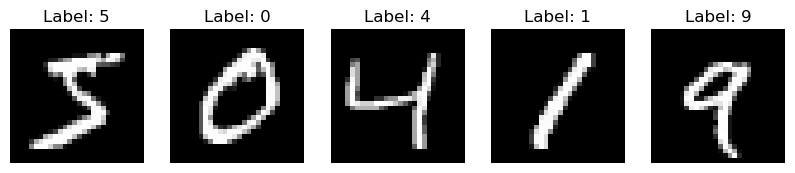

Training LeNet-5...


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8552 - loss: 0.4578 - val_accuracy: 0.9800 - val_loss: 0.0628
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9797 - loss: 0.0658 - val_accuracy: 0.9814 - val_loss: 0.0583
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9855 - loss: 0.0457 - val_accuracy: 0.9880 - val_loss: 0.0371
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0343 - val_accuracy: 0.9860 - val_loss: 0.0455
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9911 - loss: 0.0279 - val_accuracy: 0.9907 - val_loss: 0.0299
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0223 - val_accuracy: 0.9884 - val_loss: 0.0376
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9936 - loss: 0.0193 - val_accuracy: 0.9874 - val_loss: 0.0416
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9950 - loss: 0.0144 - 

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
import warnings

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Function to visualize some sample images
def imshow(images, labels):
    plt.figure(figsize=(10,5))
    for i in range(5):
        plt.subplot(1,5,i+1)
        plt.imshow(images[i].reshape(28,28), cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Show some images
imshow(train_images, train_labels)

# Define LeNet-5 Model
def build_lenet5():
    model = models.Sequential([
        layers.Conv2D(6, (5,5), activation='relu', input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(16, (5,5), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.summary()
    return model

def train_and_evaluate(model, train_images, train_labels, test_images, test_labels, epochs=10):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f'Test Accuracy: {test_acc * 100:.2f}%')


print("Training LeNet-5...")
lenet5 = build_lenet5()
train_and_evaluate(lenet5, train_images, train_labels, test_images, test_labels)

Epoch 1/10
375/375 - 1s - 3ms/step - accuracy: 0.8941 - loss: 0.3836 - val_accuracy: 0.9485 - val_loss: 0.1798
Epoch 2/10
375/375 - 1s - 2ms/step - accuracy: 0.9523 - loss: 0.1590 - val_accuracy: 0.9579 - val_loss: 0.1430
Epoch 3/10
375/375 - 0s - 1ms/step - accuracy: 0.9679 - loss: 0.1095 - val_accuracy: 0.9672 - val_loss: 0.1105
Epoch 4/10
375/375 - 0s - 1ms/step - accuracy: 0.9749 - loss: 0.0835 - val_accuracy: 0.9709 - val_loss: 0.0987
Epoch 5/10
375/375 - 0s - 1ms/step - accuracy: 0.9805 - loss: 0.0644 - val_accuracy: 0.9700 - val_loss: 0.0996
Epoch 6/10
375/375 - 1s - 1ms/step - accuracy: 0.9849 - loss: 0.0514 - val_accuracy: 0.9708 - val_loss: 0.1046
Epoch 7/10
375/375 - 0s - 1ms/step - accuracy: 0.9871 - loss: 0.0421 - val_accuracy: 0.9718 - val_loss: 0.0970
Epoch 8/10
375/375 - 1s - 1ms/step - accuracy: 0.9899 - loss: 0.0345 - val_accuracy: 0.9753 - val_loss: 0.0893
Epoch 9/10
375/375 - 0s - 1ms/step - accuracy: 0.9916 - loss: 0.0285 - val_accuracy: 0.9697 - val_loss: 0.1088
E

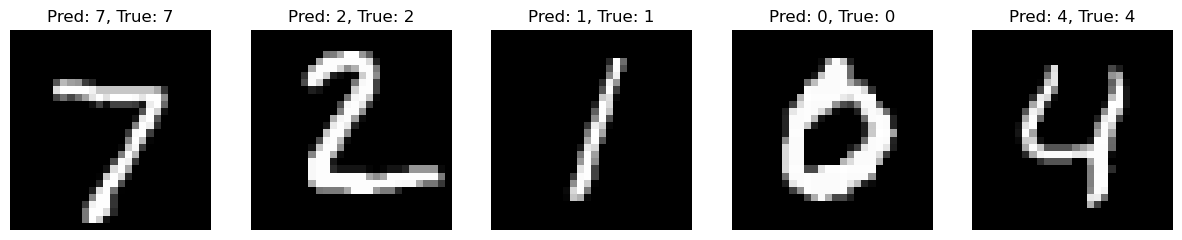

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape images to be flat vectors (28x28 -> 784)
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a simple ANN model using Sequential API
model = Sequential([
    Dense(128, input_dim=784, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, verbose=2)

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy*100:.2f}%")


# Predictions on test data
predictions = model.predict(x_test)

# Display a few predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    ax.axis('off')

plt.show()
